#  exploratory data analysis dalam data Assessment OULAD dataset

keterangan :

This file contains information about assessments in module-presentations. Usually, every presentation has a number of assessments followed by the final exam. CSV contains columns:

    code_module – identification code of the module, to which the assessment belongs.
    code_presentation - identification code of the presentation, to which the assessment belongs.
    id_assessment – identification number of the assessment.
    assessment_type – type of assessment. Three types of assessments exist: Tutor Marked Assessment (TMA), Computer Marked Assessment (CMA) and Final Exam (Exam).
    date – information about the final submission date of the assessment calculated as the number of days since the start of the module-presentation. The starting date of the presentation has number 0 (zero).
    weight - weight of the assessment in %. Typically, Exams are treated separately and have the weight 100%; the sum of all other assessments is 100%.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

code exploratory menggunakan library os dan menggunakan modifikasi dari pandas read csv untuk mendapatkan jumlah baris, kolom, tipe data, dan missing value

In [2]:
def Load_File(path) :
    if os.path.isfile(path) :
        data = pd.read_csv(path)
        data = data.replace('?', np.nan)
        print("\n" + "banyaknya baris adalah %s" % len(data))
        print("banyaknya kolom adalah %s" % len(data.columns) + "\n")
        print("tipe data :- ")
        print(data.dtypes)
        print("Missing value (null):- ")
        print(data.isnull().sum())
        
        return data
    else:
        print(path + " tidak ada")

In [11]:
df = Load_File(r'C:\Users\Kouma\Datasets\assessments.csv')


banyaknya baris adalah 206
banyaknya kolom adalah 6

tipe data :- 
code_module           object
code_presentation     object
id_assessment          int64
assessment_type       object
date                 float64
weight               float64
dtype: object
Missing value (null):- 
code_module           0
code_presentation     0
id_assessment         0
assessment_type       0
date                 11
weight                0
dtype: int64


In [12]:
df.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0


melihat macam-macam tipe assessment

In [14]:
df['assessment_type'].unique()

array(['TMA', 'Exam', 'CMA'], dtype=object)

# Preprocessing

dalam keterangan columns terdapat " If the information about the final exam date is missing, it is at the end of the last presentation week. ", yang berarti preprocessing yang bisa dilakukan adalah menghapus missing value, dan dari load data diatas terdapat 11 missing value pada date

missing value diganti dengan rata-rata jumlah hari

In [13]:
df['date'] = df['date'].fillna(int(df['date'].astype(float).mean()))

(array([22., 21., 11., 13., 22., 26., 13., 16., 51., 11.]),
 array([ 12. ,  36.9,  61.8,  86.7, 111.6, 136.5, 161.4, 186.3, 211.2,
        236.1, 261. ]),
 <BarContainer object of 10 artists>)

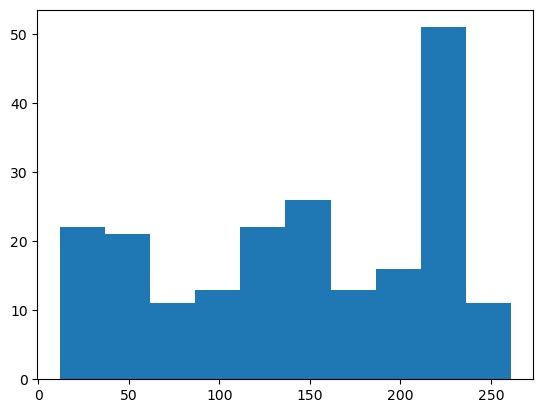

In [15]:
plt.hist(df['date'].astype(int))

karena missing value sudah terisi oleh mean dari jumlah hari, dari histogram diatas dapat dilihat bahwa sebagian besar siswa butuh waktu lebih dari 200 jam dan kurang dari 250 untuk menyelesaikan assessment